In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob 
from scipy.spatial.distance import cosine

In [2]:
VIDEO_FRAMES = glob('/datadrive/representations/frame_level/**vgg_frames.npy')

## Visualization of a given video

In [255]:
def cosine_series(arr):
    output = [1.0]
    for i in range(len(arr)):
        if i < len(arr)-1:
            a = arr[i]
            b = arr[i+1]
            dist = cosine(a,b)
            output.append(dist)
    return np.array(output)
    

def visualize_frames(fp,diffs=None):
    video = np.load(fp)
    if diffs is not None:
        frames_idx = (diffs > np.quantile(diffs,.90)) & (diffs > 0.05)
        sample_frames = video[frames_idx]
    else:
        sample_frames = video[0::1,:,:,:]
    plot = sum(frames_idx) >= 3
    
    if plot:
        
        plt.figure(figsize=(10,10))
        plt.imshow(np.hstack(sample_frames))
        plt.show()

        plt.figure(figsize=(5,5))
        plt.plot(list(range(len(diffs))),diffs)
        plt.plot(list(range(len(diffs))),diffs*frames_idx,'bo')
        plt.show()
    
    
def naive_diff(arr):
    diffs = np.diff(arr)
    sdiffs = np.absolute(np.sum(diffs,axis=1))**24
    return np.insert(sdiffs,0,[1])
    
def visualize_features(fp,diff_function=cosine_series):
    nfp = fp.replace('frames','features')
    feats = np.load(nfp)
    sdiffs = diff_function(feats)

    return sdiffs

def visualize_vid(fp):
    sdiffs = visualize_features(fp)
    visualize_frames(fp,diffs=sdiffs)

def get_duration(scenes):
    return [y-x for x,y in scenes]

In [280]:
def extract_scenes(list_of_files,minimum_duration=10):

    filtered_videos = [x for x in list_of_files if np.load(x).shape[0] > minimum_duration]

    raw_scenes = [visualize_features(x) for x in filtered_videos]

    scene_ident = [((diffs > np.quantile(diffs,.90)) & (diffs > 0.05)) for diffs in raw_scenes]

    num_scens = [sum(sid) for sid in scene_ident]

    video_scenes = []
    for sid in scene_ident:
        idxs = np.array(list(range(len(sid))))[sid]
        scenes = []
        for z,i in enumerate(idxs):
            start = i
            if z == (len(idxs) - 1):
                end = len(sid) - 1
            else:
                end = idxs[z + 1]
            scenes.append([start,end])
        video_scenes.append(scenes)


    durations = [get_duration(x) for x in video_scenes]
    num_scenes = [len(x) for x in video_scenes]
    avg_duration = [np.mean(x) for x in durations]
    total_video = [sid.shape[0] for sid in scene_ident]
    return filtered_videos,durations,num_scenes,avg_duration,total_video

In [ ]:
avg_duration

In [ ]:
num_scenes

In [281]:
scene_metadata = pd.DataFrame(dict(fp=filtered_videos,scene_duration=durations,num_scenes=num_scenes,avg_duration=avg_duration,video_duration=total_video))

In [282]:
scene_metadata.head()

,fp,scene_duration,num_scenes,avg_duration,video_duration
0,/datadrive/representations/frame_level/b36b0e1...,"[6, 8]",2,7.000000,15
1,/datadrive/representations/frame_level/82KKCxX...,"[9, 5, 22, 1, 4]",5,8.200000,42
2,/datadrive/representations/frame_level/149f7cd...,"[20, 11, 8]",3,13.000000,40
3,/datadrive/representations/frame_level/cf6ee75...,"[2, 3, 1, 30, 1, 44, 1, 14, 1, 9, 1, 6]",12,9.416667,114
4,/datadrive/representations/frame_level/gwInZFd...,"[11, 1, 17]",3,9.666667,30


In [272]:
durations

[[6, 8],
 [9, 5, 22, 1, 4],
 [20, 11, 8],
 [2, 3, 1, 30, 1, 44, 1, 14, 1, 9, 1, 6],
 [11, 1, 17],
 [91],
 [19, 1, 7],
 [33, 7, 4, 1, 45],
 [11, 1, 13, 7],
 [19, 1],
 [1, 22, 4],
 [2, 14, 11],
 [106],
 [12],
 [200, 72, 1, 5, 34, 11, 12, 27, 8, 1, 39, 26],
 [18],
 [1, 27, 2, 8],
 [117],
 [1, 21, 29],
 [129, 128],
 [1, 66, 4, 10, 25, 8, 51, 4, 2, 1, 1, 21, 6, 1, 5, 6, 22, 12, 24, 2],
 [25, 1, 4, 8],
 [33],
 [6, 1, 36],
 [1, 3, 1, 18, 40, 1, 10, 1, 22, 1, 1, 8, 12, 2, 28],
 [1, 24],
 [428, 5, 1, 608, 19, 1, 623, 6, 10, 1, 1, 2, 1, 1],
 [1, 15, 9],
 [1, 18, 1, 10, 19],
 [88],
 [12, 5, 14, 4, 6, 11],
 [8, 1, 2, 54, 1, 21],
 [23, 31],
 [21, 6],
 [49, 7],
 [2, 12, 25, 52, 14],
 [43],
 [26],
 [1, 6, 1, 3, 24, 9, 25],
 [1, 32],
 [1, 9, 1, 9, 10, 10, 10, 10, 20, 20, 10, 10, 20, 10, 1, 2],
 [3, 16, 5, 9, 15, 12, 3],
 [41, 1, 6],
 [15, 12, 4, 13, 3, 1, 16, 14, 13, 3],
 [17, 12, 10, 1, 14, 0],
 [25, 1],
 [4, 4, 10, 15],
 [1, 74],
 [1, 23, 4],
 [45],
 [13],
 [30, 4, 9, 2, 18, 2, 10, 7],
 [16, 0],
 [1

In [ ]:
for i in range(len(VIDEO_FRAMES)):
    try:
        visualize_vid(VIDEO_FRAMES[i])
    except Exception as e:
        print('Failed',e)

In [266]:
sdiffs = visualize_features(VIDEO_FRAMES[2])

In [267]:
pd.Series.describe(pd.Series(sdiffs))

count    40.000000
mean      0.055715
std       0.153358
min       0.019937
25%       0.026030
50%       0.030375
75%       0.035806
max       1.000000
dtype: float64

In [138]:
sum(sdiffs > np.quantile(sdiffs,.90))

4

In [97]:
sdiffs

array([0.03040418, 0.02869478, 0.02782777, 0.02628914, 0.01751731,
       0.02415951, 0.02822855, 0.01885101, 0.02080346, 0.02285378,
       0.02319484, 0.02164979, 0.02596296, 0.02300828, 0.02326941])

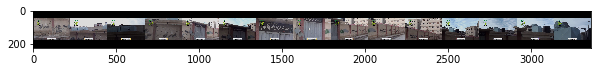

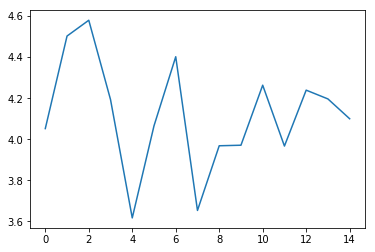

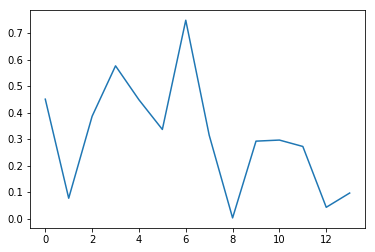

In [88]:
visualize_vid(VIDEO_FRAMES[0])

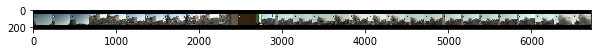

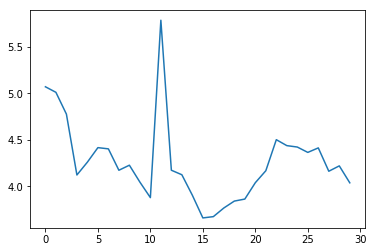

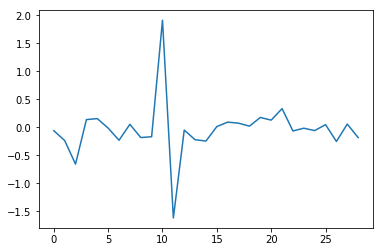

In [85]:
visualize_vid(VIDEO_FRAMES[4])

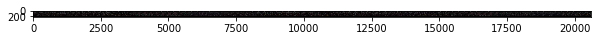

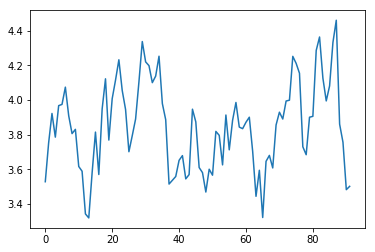

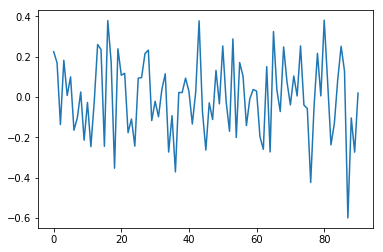

In [86]:
visualize_vid(VIDEO_FRAMES[5])

## What if we make our preview based on the output of those differences?